In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2013 = pd.read_csv('clean_players_2013.csv')

In [3]:
df_2013

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,1,201166,Aaron Brooks,1610612743,DEN,29.0,72,42,30,0.583,...,139,187,208,184,306,215,140,27,5,"201166,1610612743"
1,2,201189,Aaron Gray,1610612758,SAC,29.0,37,12,25,0.324,...,282,269,414,436,370,393,234,27,5,"201189,1610612758"
2,4,1733,Al Harrington,1610612764,WAS,34.0,34,20,14,0.588,...,265,168,255,244,123,316,234,27,5,"1733,1610612764"
3,5,201143,Al Horford,1610612737,ATL,28.0,29,16,13,0.552,...,155,215,120,29,77,19,69,27,5,"201143,1610612737"
4,6,2744,Al Jefferson,1610612766,CHA,29.0,73,38,35,0.521,...,22,107,78,11,183,12,8,27,5,"2744,1610612766"
5,7,202329,Al-Farouq Aminu,1610612740,NOP,23.0,80,33,47,0.413,...,93,236,214,227,421,163,97,27,5,"202329,1610612740"
6,8,101187,Alan Anderson,1610612751,BKN,31.0,78,43,35,0.551,...,253,226,177,224,270,274,234,27,5,"101187,1610612751"
7,9,202692,Alec Burks,1610612762,UTA,22.0,78,24,54,0.308,...,40,100,35,81,430,131,234,27,5,"202692,1610612762"
8,10,203458,Alex Len,1610612756,PHX,21.0,42,24,18,0.571,...,371,286,386,425,301,403,234,27,5,"203458,1610612756"
9,11,203144,Alexey Shved,1610612750,MIN,25.0,63,28,35,0.444,...,311,452,253,335,255,360,234,27,5,"203144,1610612750"


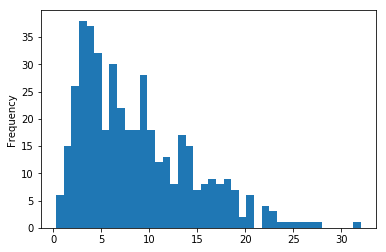

In [4]:
df_2013['PTS'].plot.hist(bins=40)

In [5]:
df_2013.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [6]:
z,pval = stats.normaltest(df_2013['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2013['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2013['PTS'])
stat, kpval = kstest(df_2013['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2013['PTS'])
stat, kpval = kstest(df_2013['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

53.6973261722 2.18662231178e-12
PTS Is not from a Normal Dist
0.0388155357217 0.516142920773
PTS Is likley from a Gamma Dist
0.046273143586 0.293404658953
PTS Is likley from a Log norm Dist


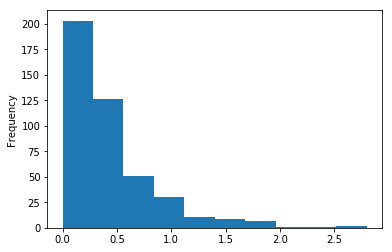

In [7]:
df_2013['BLK'].plot.hist(bins=10)

In [8]:
z,pval = stats.normaltest(df_2013['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2013['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2013['BLK'])
stat, kpval = kstest(df_2013['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2013['BLK'])
stat, kpval = kstest(df_2013['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2013['BLK'])
stat, kpval = kstest(df_2013['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2013['BLK'])
stat, kpval = kstest(df_2013['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


202.265080388 1.19865955837e-44
BLK Is not from a Normal Dist
0.108805388666 5.30833680412e-05
BLK Is not from a Exponen Dist
0.237051249248 0.0
BLK Is not from a Gamma Dist
0.104590987102 0.000118104068049
BLK Is not from a Log norm Dist
0.245567510597 0.0
BLK Is not from a Chisq Dist


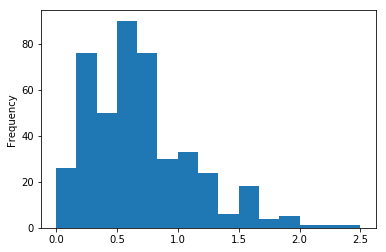

In [9]:
df_2013['STL'].plot.hist(bins=15)

In [10]:
z,pval = stats.normaltest(df_2013['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2013['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2013['STL'])
stat, kpval = kstest(df_2013['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2013['STL'])
stat, kpval = kstest(df_2013['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2013['STL'])
stat, kpval = kstest(df_2013['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

72.0487997952 2.2636115988e-16
STL Is not from a Normal Dist
0.0662435152756 0.039823902092
STL Is not from a Gamma Dist
0.2187893984 0.0
STL Is not from a Exponen Dist
0.0657520704971 0.0421861692114
STL Is not from a Log norm Dist


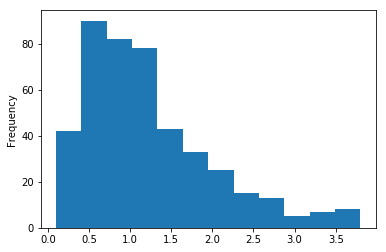

In [11]:
df_2013['TOV'].plot.hist(bins=12)

In [13]:
z,pval = stats.normaltest(df_2013['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2013['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2013['TOV'])
stat, kpval = kstest(df_2013['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2013['TOV'])
stat, kpval = kstest(df_2013['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

72.2616545804 2.03507810238e-16
TOV Is not from a Normal Dist
0.0558614970137 0.122832957444
TOV Is likley from a Gamma Dist
0.04480229852 0.330542503734
TOV Is likley from a Log norm Dist


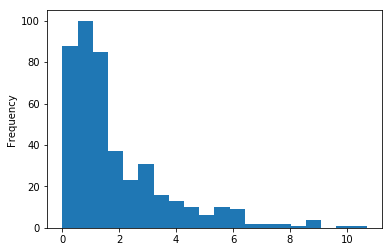

In [14]:
df_2013['AST'].plot.hist(bins=20)

In [15]:
z,pval = stats.normaltest(df_2013['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2013['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2013['AST'])
stat, kpval = kstest(df_2013['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2013['AST'])
stat, kpval = kstest(df_2013['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

165.604820489 1.09488912574e-36
AST Is not from a Normal Dist
0.0787544144242 0.00794958945982
AST Is not from a Gamma Dist
0.0477575111614 0.259147204579
AST Is likley from a Log norm Dist


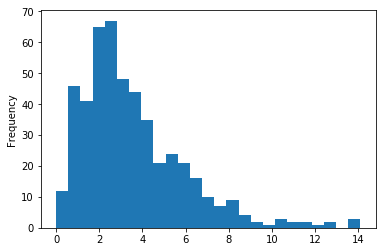

In [15]:
df_2013['REB'].plot.hist(bins=25)

In [16]:
z,pval = stats.normaltest(df_2013['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2013['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2013['REB'])
stat, kpval = kstest(df_2013['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2013['REB'])
stat, kpval = kstest(df_2013['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

99.6343296035 2.31568894603e-22
REB Is not from a Normal Dist
0.0277552469767 0.886131512774
REB Is likley from a Gamma Dist
0.0242317686833 0.957988560602
REB Is likley from a Log norm Dist
